
# Market Analysis: Top Products & Loyal Customers


## **Objective**
The goal of this analysis is to:
1. Identify the top 3 most profitable products based on transaction data.
2. Determine the most loyal customer segments based on total spending.
3. Provide insights into why these customers may prefer certain products.

---

In [10]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load datasets
purchase_data = pd.read_csv("purchase_behaviour.csv")
transaction_data = pd.read_csv("transaction_data.csv")

# Display basic information
purchase_data.info(), purchase_data.head(), transaction_data.info(), transaction_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   LYLTY_CARD_NBR    72637 non-null  int64 
 1   LIFESTAGE         72637 non-null  object
 2   PREMIUM_CUSTOMER  72637 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DATE            264836 non-null  int64  
 1   STORE_NBR       264836 non-null  int64  
 2   LYLTY_CARD_NBR  264836 non-null  int64  
 3   TXN_ID          264836 non-null  int64  
 4   PROD_NBR        264836 non-null  int64  
 5   PROD_NAME       264836 non-null  object 
 6   PROD_QTY        264836 non-null  int64  
 7   TOT_SALES       264836 non-null  float64
dtypes: float64(1), int64(6), object(1)
me

(None,
    LYLTY_CARD_NBR               LIFESTAGE PREMIUM_CUSTOMER
 0            1000   YOUNG SINGLES/COUPLES          Premium
 1            1002   YOUNG SINGLES/COUPLES       Mainstream
 2            1003          YOUNG FAMILIES           Budget
 3            1004   OLDER SINGLES/COUPLES       Mainstream
 4            1005  MIDAGE SINGLES/COUPLES       Mainstream,
 None,
     DATE  STORE_NBR  LYLTY_CARD_NBR  TXN_ID  PROD_NBR  \
 0  43390          1            1000       1         5   
 1  43599          1            1307     348        66   
 2  43605          1            1343     383        61   
 3  43329          2            2373     974        69   
 4  43330          2            2426    1038       108   
 
                                   PROD_NAME  PROD_QTY  TOT_SALES  
 0    Natural Chip        Compny SeaSalt175g         2        6.0  
 1                  CCs Nacho Cheese    175g         3        6.3  
 2    Smiths Crinkle Cut  Chips Chicken 170g         2        2.9  
 3 

In [11]:
# Identify the top 3 most profitable products
top_products = transaction_data.groupby("PROD_NAME")["TOT_SALES"].sum().nlargest(3).reset_index()
print("\nTop 3 Most Profitable Products:")
top_products


Top 3 Most Profitable Products:


,PROD_NAME,TOT_SALES
0,Dorito Corn Chp Supreme 380g,40352.0
1,Smiths Crnkle Chip Orgnl Big Bag 380g,36367.6
2,Smiths Crinkle Chips Salt & Vinegar 330g,34804.2


In [12]:
# Merge transaction data with customer data
merged_data = transaction_data.merge(purchase_data, on="LYLTY_CARD_NBR")
# Identify the most loyal customer segments based on total spending
loyal_customers = merged_data.groupby(["LIFESTAGE", "PREMIUM_CUSTOMER"])["TOT_SALES"].sum().reset_index()
top_loyal_customers = loyal_customers.nlargest(3, "TOT_SALES")
print("\nTop 3 Most Loyal Customer Segments:")
top_loyal_customers 


Top 3 Most Loyal Customer Segments:


,LIFESTAGE,PREMIUM_CUSTOMER,TOT_SALES
6,OLDER FAMILIES,Budget,168363.25
19,YOUNG SINGLES/COUPLES,Mainstream,157621.60
13,RETIREES,Mainstream,155677.05


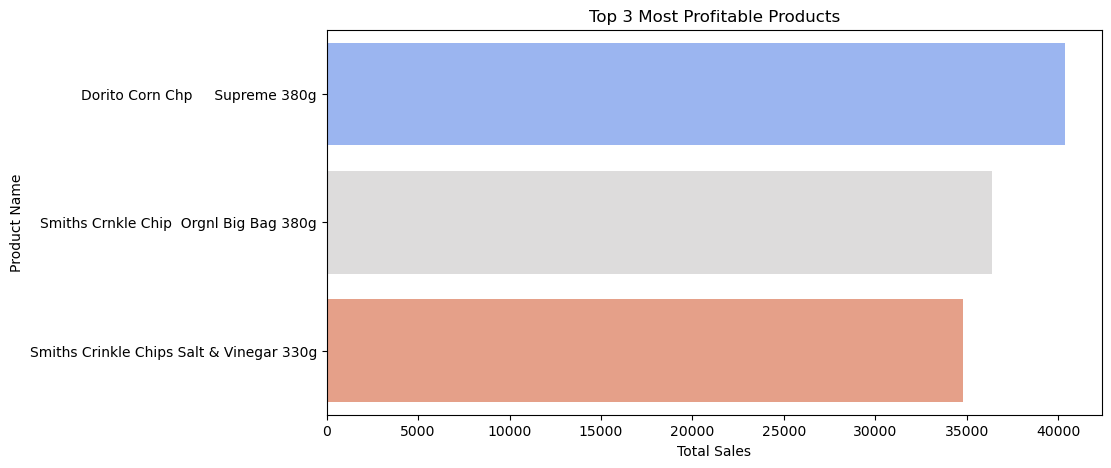

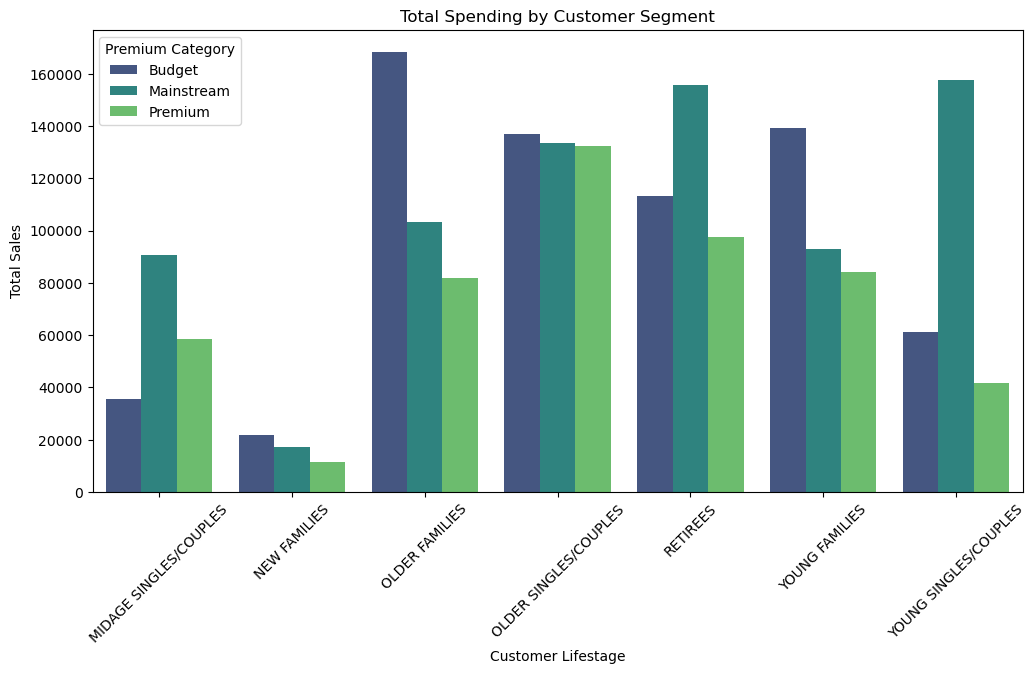


Top 3 Most Profitable Products:
                                  PROD_NAME  TOT_SALES
0          Dorito Corn Chp     Supreme 380g    40352.0
1    Smiths Crnkle Chip  Orgnl Big Bag 380g    36367.6
2  Smiths Crinkle Chips Salt & Vinegar 330g    34804.2

Top 3 Most Loyal Customer Segments:
                LIFESTAGE PREMIUM_CUSTOMER  TOT_SALES
6          OLDER FAMILIES           Budget  168363.25
19  YOUNG SINGLES/COUPLES       Mainstream  157621.60
13               RETIREES       Mainstream  155677.05


In [13]:
# Visualization: Top 3 most profitable products
plt.figure(figsize=(10, 5))
sns.barplot(data=top_products, x="TOT_SALES", y="PROD_NAME", palette="coolwarm")
plt.xlabel("Total Sales")
plt.ylabel("Product Name")
plt.title("Top 3 Most Profitable Products")
plt.show()

# Visualization: Spending by Customer Segments
plt.figure(figsize=(12, 6))
sns.barplot(data=loyal_customers, x="LIFESTAGE", y="TOT_SALES", hue="PREMIUM_CUSTOMER", palette="viridis")
plt.xticks(rotation=45)
plt.xlabel("Customer Lifestage")
plt.ylabel("Total Sales")
plt.title("Total Spending by Customer Segment")
plt.legend(title="Premium Category")
plt.show()

# Display the results
print("\nTop 3 Most Profitable Products:")
print(top_products)

print("\nTop 3 Most Loyal Customer Segments:")
print(top_loyal_customers)

## **Findings**

### **Top 3 Most Profitable Products**
1. **Dorito Corn Chip Supreme 380g** – \40,352  
2. **Smiths Crinkle Chip Original Big Bag 380g** – \36,367.60  
3. **Smiths Crinkle Chips Salt & Vinegar 330g** – \34,804.20  

These products likely sell well due to their larger pack sizes, making them ideal for families or bulk buyers.

### **Most Loyal (High-Spending) Customer Segments**
1. **Older Families (Budget buyers)** – \168,363.25  
2. **Young Singles/Couples (Mainstream buyers)** – \157,621.60  
3. **Retirees (Mainstream buyers)** – \155,677.05  

### **Hypothesis**
- **Older families** (budget buyers) likely prefer affordable bulk purchases, leading to higher spending.  
- **Young singles/couples** (mainstream buyers) might favor convenience and variety in snacks.  
- **Retirees** (mainstream buyers) could be regular snack consumers, enjoying familiar brands.  
